## Loading data

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Define a transform to convert the images to tensor
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
# Download the MNIST training dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download the MNIST test dataset
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4954236.06it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159310.04it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1291149.05it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3255387.69it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Convert to NumPy arrays
train_data_np = mnist_train.data.numpy()

In [ ]:
image = train_data_np[0]

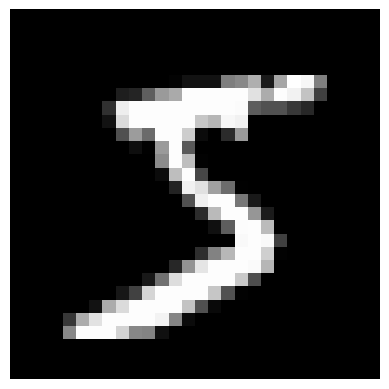

In [ ]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# data processing


In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=64, shuffle=False)

In [ ]:
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break  # Remove this line to iterate through the entire DataLoader

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


# Building simple NN

In [ ]:
import torch.nn as nn

In [ ]:
# Define the MLP model
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)     # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)  # Output layer
        return x

In [ ]:
Neural_Network = NN()

# Training your Network

In [ ]:
import torch.optim as optim
learning_rate = 0.002
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Neural_Network.parameters(), lr=learning_rate)
epochs = 10
# Training loop
for epoch in range(epochs):
    Neural_Network.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = Neural_Network(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch}')


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [ ]:
# Evaluation loop
from sklearn.metrics import confusion_matrix

Neural_Network.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = Neural_Network(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

In [ ]:
conf_matrix = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 970    0    2    0    1    1    3    3    0    0]
 [   3 1119    2    0    1    1    2    1    6    0]
 [   7    0 1013    5    0    1    0    2    4    0]
 [   3    0    4  980    0   11    0    6    4    2]
 [   1    0    2    1  968    0    4    2    0    4]
 [   2    0    0    6    1  872    5    3    2    1]
 [   2    3    0    1    3    4  944    0    1    0]
 [   1    4    8    3    1    1    0 1004    3    3]
 [   6    0    4    3    4   11   10    5  926    5]
 [   3    1    0    7   25    7    0    9    0  957]]
